## Introduction
This assignment focuses on the wine dataset containing information on over 12,700 wines. It includes both numerical chemical composition attributes, including pH, alcohol content, and citric acid, along with categorical marketing indicator attributes such as label appeal and stars rating. However, the dataset is "messy" since it suffers from various data quality issues such as missing values, improper data type usage, and potentially outlier values, which can prevent proper analysis or modeling. To address these issues, we are going to take steps to transform the raw data into a more clean and reliable format for analysis. These steps include:
1. Exploration
2. Handle missing values
3. Data type correction
4. Analyze outliers and relationships through statistical techniques and visualizations
5. Standardization and transformation
6. Review

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/Anthony-Jerez/CS-Uploading-and-Processing-Data/refs/heads/main/Day2_Data.csv"
df = pd.read_csv(url) # load dataset into a dataframe

df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [65]:
# drop redudant column
df.drop('INDEX', axis=1, inplace=True)
df.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


## EDA

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TARGET              12795 non-null  int64  
 1   FixedAcidity        12795 non-null  float64
 2   VolatileAcidity     12795 non-null  float64
 3   CitricAcid          12795 non-null  float64
 4   ResidualSugar       12179 non-null  float64
 5   Chlorides           12157 non-null  float64
 6   FreeSulfurDioxide   12148 non-null  float64
 7   TotalSulfurDioxide  12113 non-null  float64
 8   Density             12795 non-null  float64
 9   pH                  12400 non-null  float64
 10  Sulphates           11585 non-null  float64
 11  Alcohol             12142 non-null  float64
 12  LabelAppeal         12795 non-null  int64  
 13  AcidIndex           12795 non-null  int64  
 14  STARS               9436 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 1.5 MB


Here we see that some of the data types used are inconsistent. For example, the "STARS" attribute is of the float data type but it's composed of integer rating values from 1 - 4. It should instead be of type int64. We can also see that there are certain columns that contain null values.

In [67]:
df.describe() # summary statistics

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


In [68]:
negative_counts = (df.select_dtypes(include='number') < 0).sum()
negative_counts = negative_counts[negative_counts > 0]
print(negative_counts)

FixedAcidity          1621
VolatileAcidity       2827
CitricAcid            2966
ResidualSugar         3136
Chlorides             3197
FreeSulfurDioxide     3036
TotalSulfurDioxide    2504
Sulphates             2361
Alcohol                118
LabelAppeal           3640
dtype: int64


Here we can see that there are negative values present in certain columns where it should be non-negative instead such as any chemical composition attributes.

In [69]:
df.isnull().sum()

,0
TARGET,0
FixedAcidity,0
VolatileAcidity,0
CitricAcid,0
ResidualSugar,616
Chlorides,638
FreeSulfurDioxide,647
TotalSulfurDioxide,682
Density,0
pH,395


Based on the above, we can see that certain columns contain null values which may require imputation or dropping.

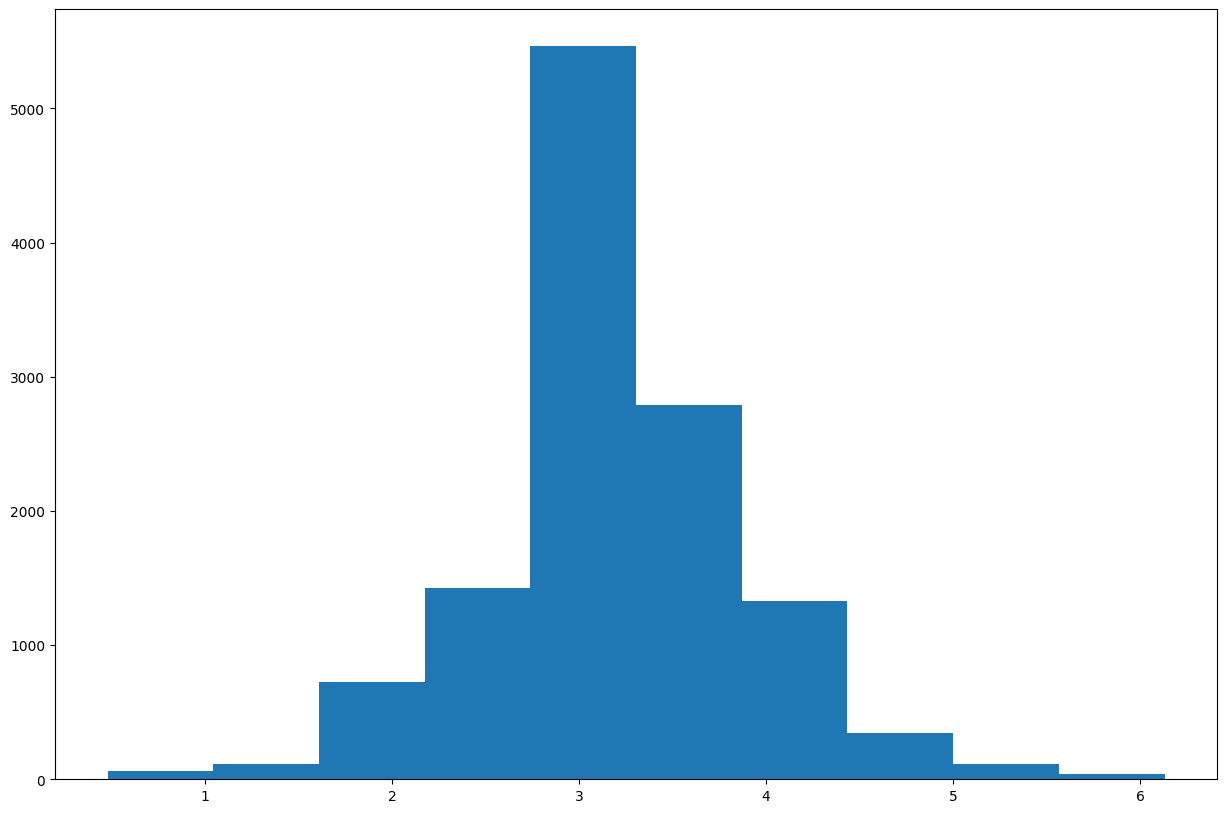

In [70]:
plt.figure(figsize=(15, 10))
plt.hist(df['pH'])
plt.show()

Based on the graph, most wines tend to have a pH value in the range of 2 - 4. The most common pH value by far is 3 which is considered to be in the moderate acidic range. However, they all do fall in the acidic side with the very acidic and slightly acidic ranges being rare.

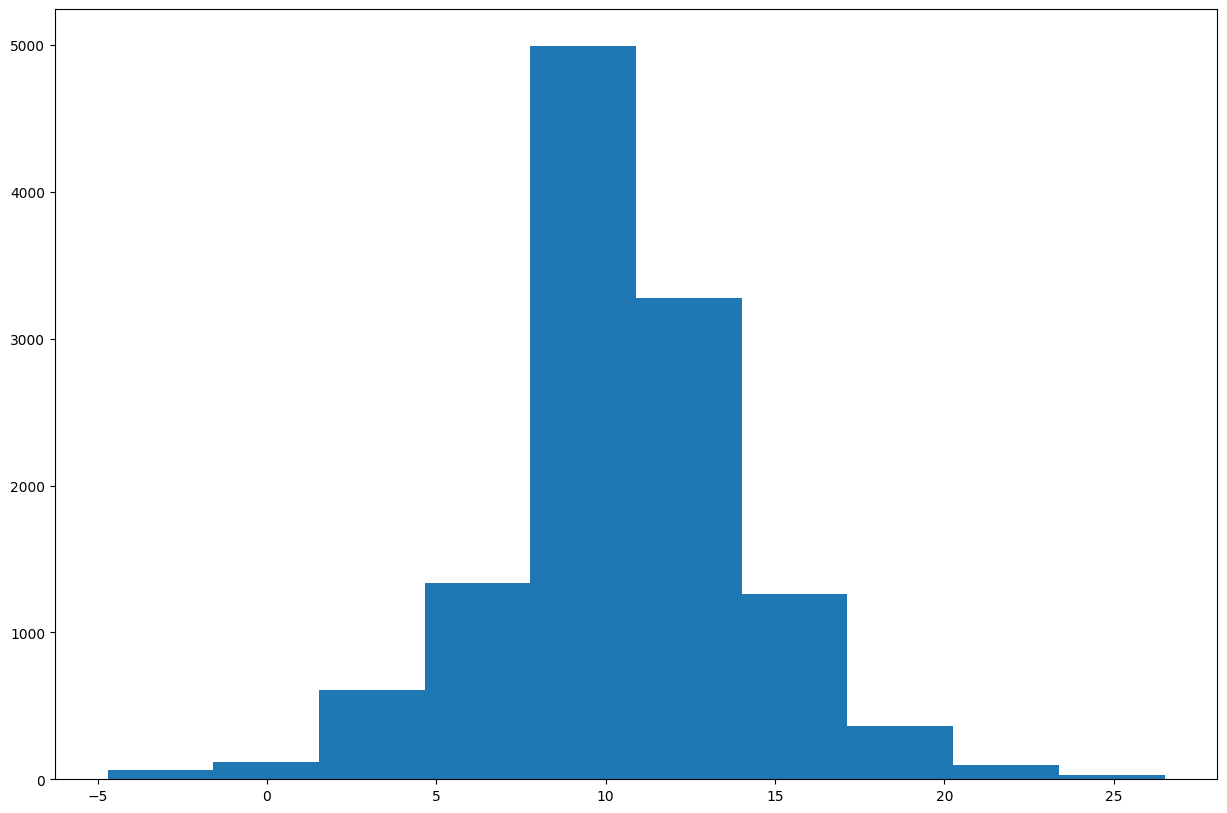

In [71]:
plt.figure(figsize=(15, 10))
plt.hist(df['Alcohol'])
plt.show()

Based on the above plot, most wines have an alcohol content value around the range of 10. The highest possible content value can be over 20 while the lowest can be close to 0.

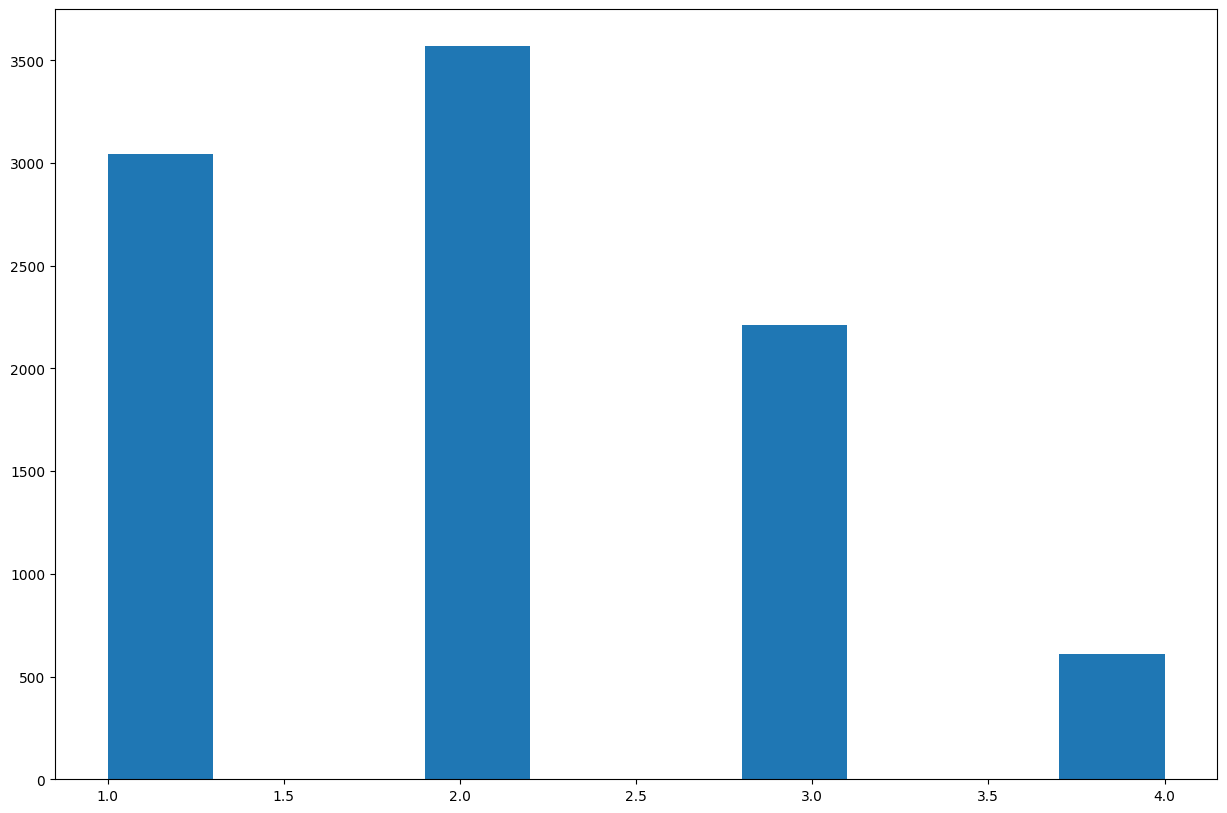

In [72]:
plt.figure(figsize=(15, 10))
plt.hist(df['STARS'])
plt.show()

Based on the above plot, most wines have a poor rating since the most prevalent values are 2 followed by 1. Less wines are considered to be good and lesser wines are considered to be excellent.

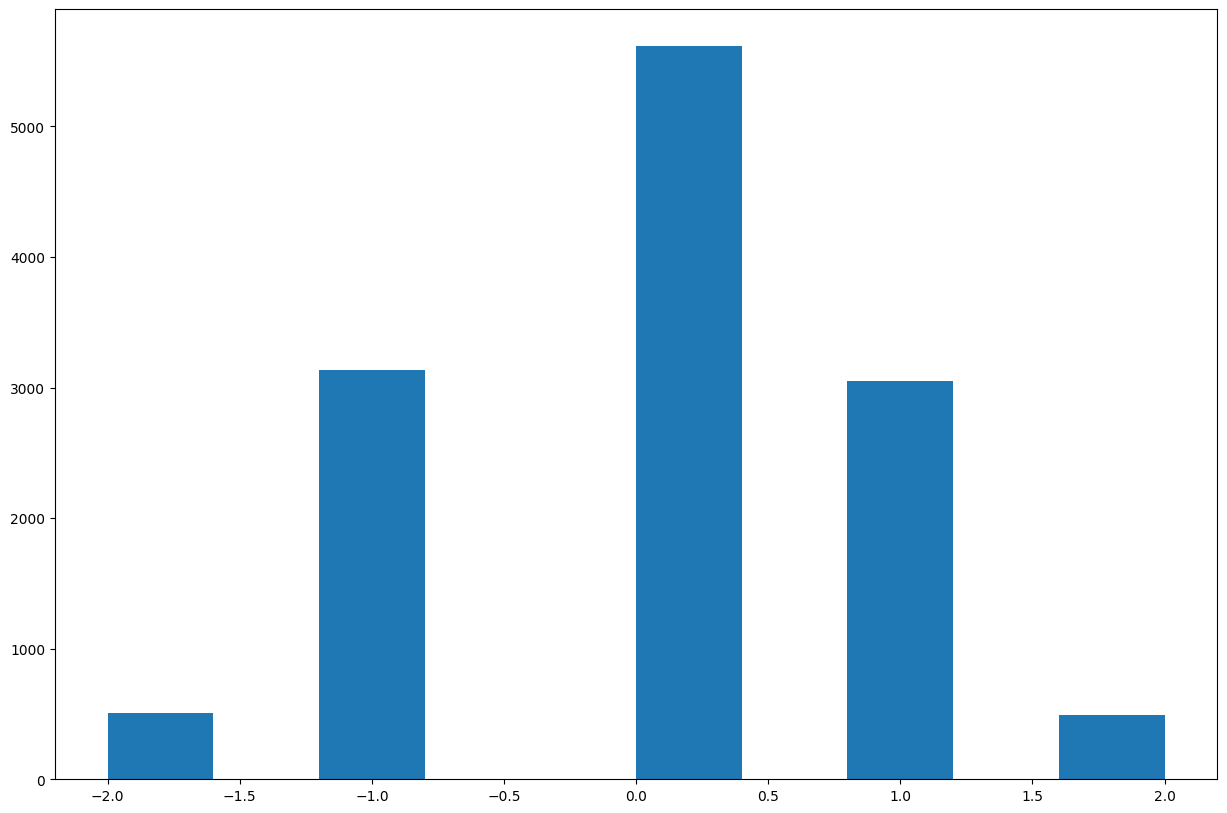

In [73]:
plt.figure(figsize=(15, 10))
plt.hist(df['LabelAppeal'])
plt.show()

Based on the above plot, the label appeal marketing indicator is in the integer range of -2 to 2. Most people tend to find the bottle design to be alright. However, the plot also appears to be close to being perfectly symmetrical, indicating most people have differing views on this.

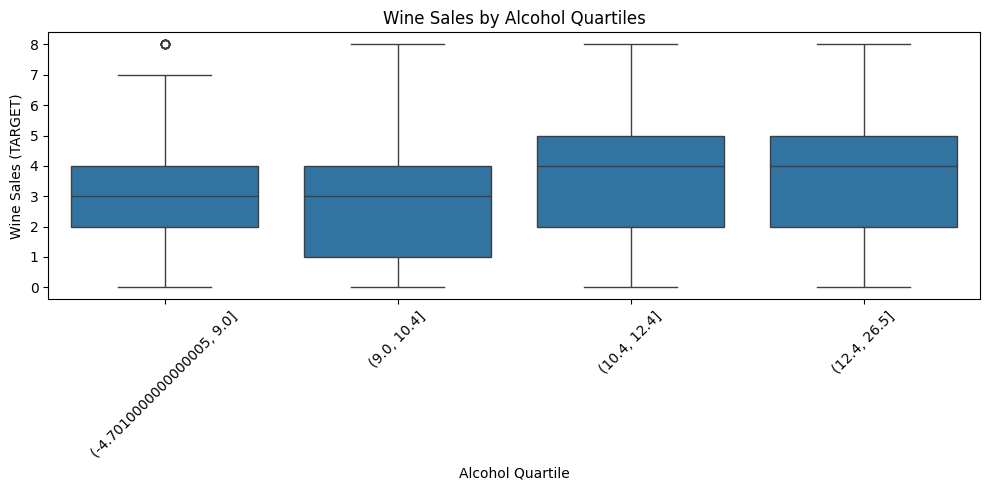

In [74]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=pd.qcut(df['Alcohol'], q=4), y=df['TARGET'])
plt.title("Wine Sales by Alcohol Quartiles")
plt.xlabel("Alcohol Quartile")
plt.ylabel("Wine Sales (TARGET)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the above plots, we can see that the two upper quartile ranges have a higher median wine sales value. Additionally, these plots have a higher Q1-Q3 range. It appears that a higher alchol content is associated with higher wine sales.

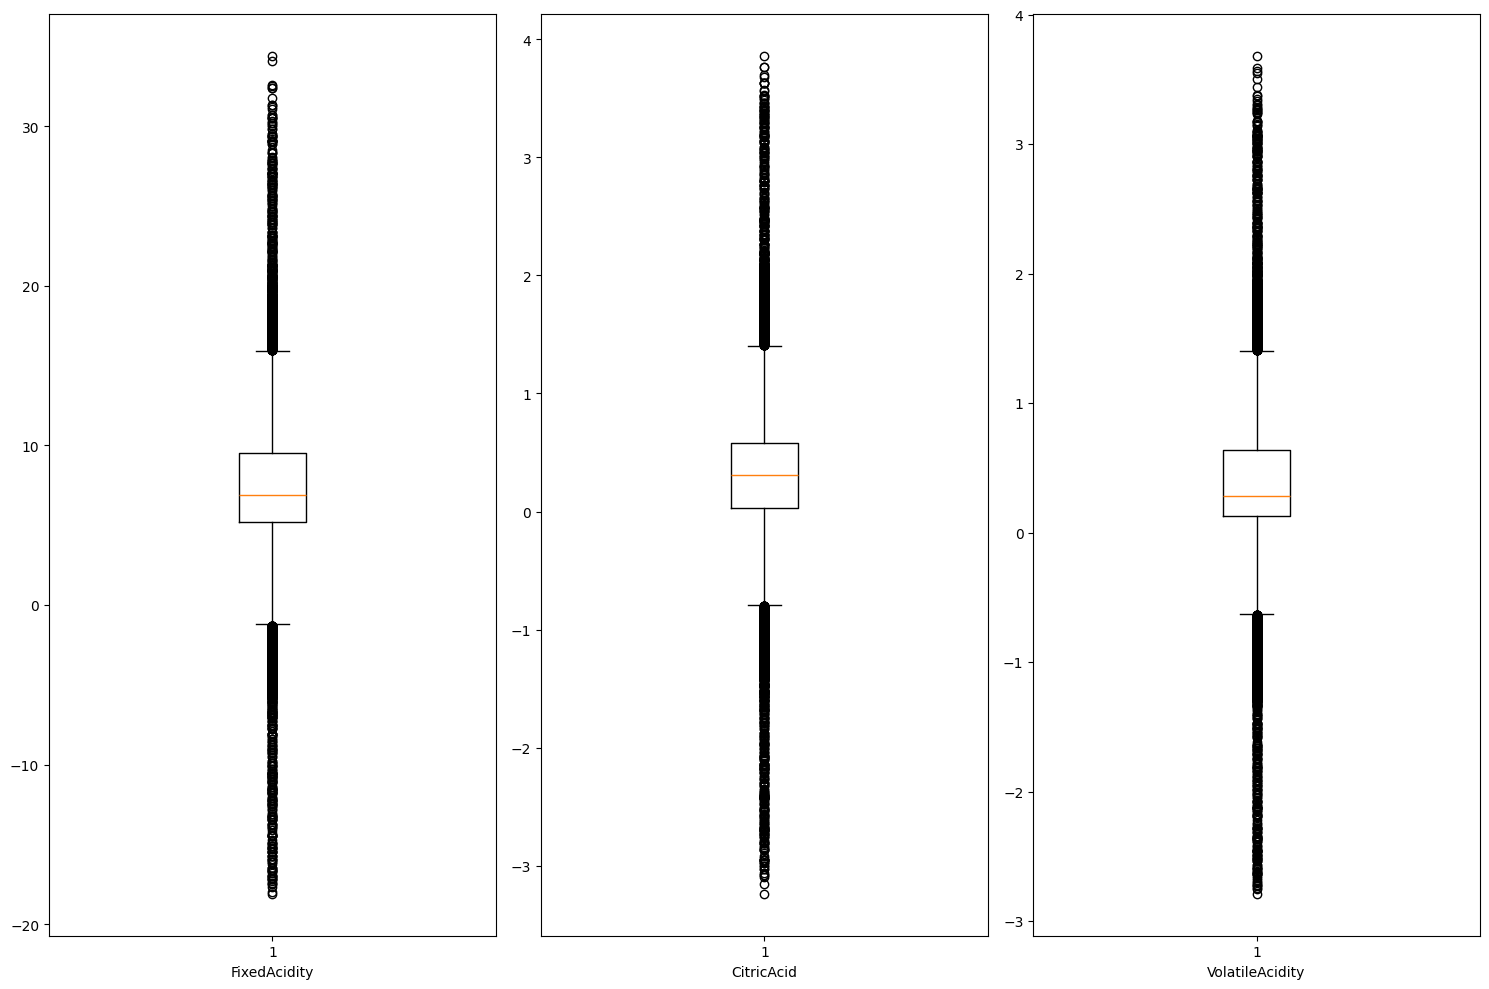

In [75]:
plt.figure(figsize=(15, 10))
# Fixed Acidity
plt.subplot(1, 3, 1)
plt.boxplot(df['FixedAcidity'].dropna())
plt.xlabel('FixedAcidity')
# Citric acid
plt.subplot(1, 3, 2)
plt.boxplot(df['CitricAcid'].dropna())
plt.xlabel('CitricAcid')
# volatile acidity
plt.subplot(1, 3, 3)
plt.boxplot(df['VolatileAcidity'].dropna())
plt.xlabel('VolatileAcidity')
plt.tight_layout()
plt.show()

Based on the above graphs, it's clear that each acidity content atribute contains lots of outliers and negative values when it shouldn't be possible.

<Axes: >

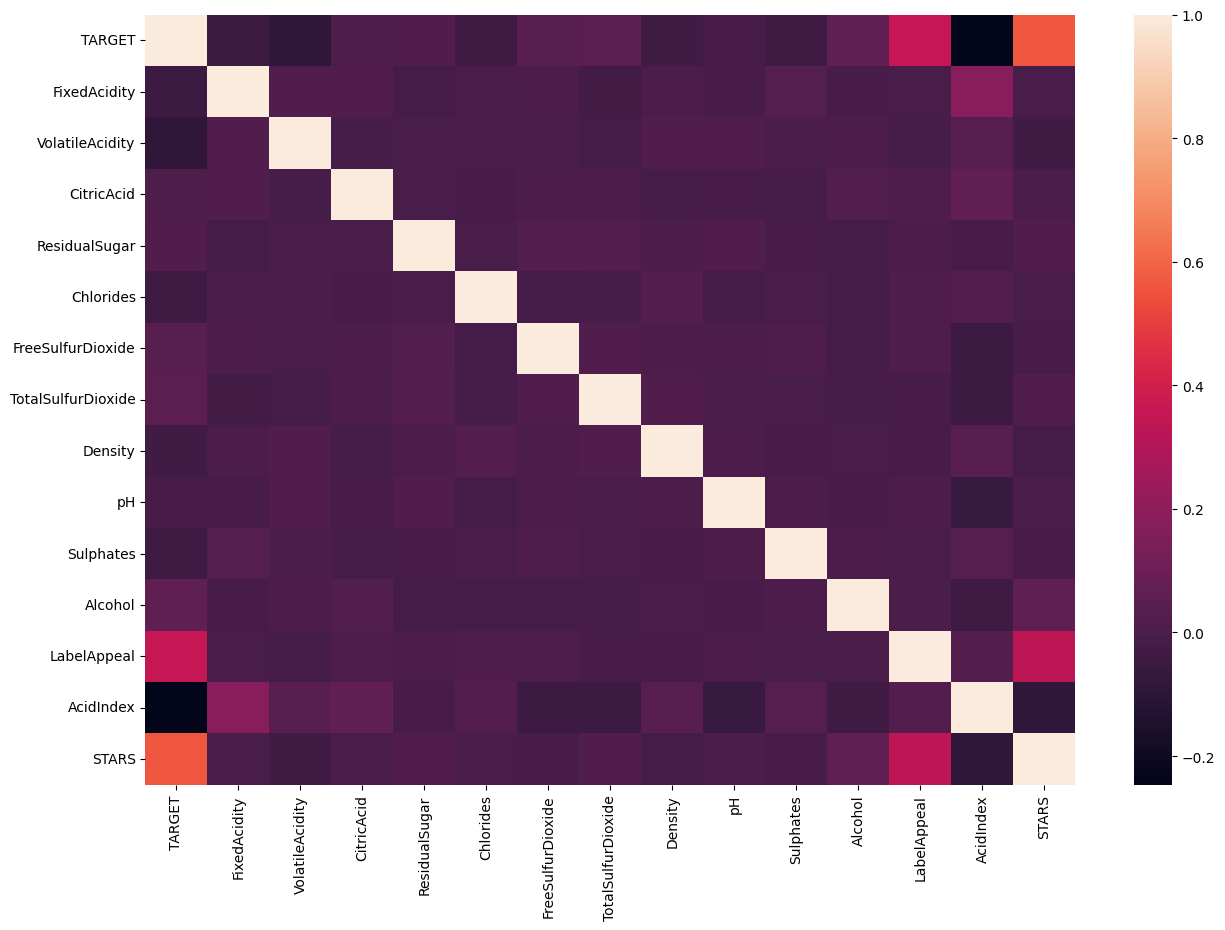

In [76]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr)

Based on the above plot, the amount of wine sales is related with the stars rating assigned.

### EDA Conclusion
Based on the exploration and above plots, it's clear that steps need to be taken to address the issues concerning the raw data. This involves addressing the outliers, null values, and improper values that don't align with its attribute.

## Data Preparation

In [77]:
df_copy = df.copy()
columns_to_clean = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Sulphates', 'Alcohol']
for column in columns_to_clean:
    df_copy.loc[df_copy[column] < 0, column] = np.nan

We replace all negative values with NaN for each numerical composition attribute that isn't supposed to contain negative values.

In [79]:
df_copy['STARS'] = df_copy['STARS'].astype('Int64')

Since, STARS is always an integer in the range of 1-4, we can convert it into of type of int64.

In [80]:
median_columns = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Sulphates', 'Alcohol', 'pH']

In [81]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')

for column in median_columns:
  df_copy[[column]] = median_imputer.fit_transform(df_copy[[column]])

In [82]:
mode_imputer = SimpleImputer(strategy='most_frequent')
df_copy[['STARS']] = mode_imputer.fit_transform(df_copy[['STARS']])

To fill in the missing values in certain columns, I used SimpleImputer to perform imputation by leveraging mode and median to fill in values for numerical and categorical columns.

In [83]:
from sklearn.preprocessing import MinMaxScaler

for column in ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'Alcohol', 'Density']:
  scaler = MinMaxScaler()
  df_copy[column] = scaler.fit_transform(df_copy[[column]])

To ensure proper data modeling, Min-Max normalization was applied to the specified attributes. This scales these features to a range between 0 and 1 to allow machine learning algorithms to converge effectively.

In [85]:
df_copy['sulfur_ratio'] = np.where(
  df_copy['TotalSulfurDioxide'] == 0,
  np.nan,
  df_copy['FreeSulfurDioxide'] / df_copy['TotalSulfurDioxide']
)

In [88]:
df_copy.isnull().sum()

,0
TARGET,0
FixedAcidity,0
VolatileAcidity,0
CitricAcid,0
ResidualSugar,0
Chlorides,0
FreeSulfurDioxide,0
TotalSulfurDioxide,0
Density,0
pH,0


In [90]:
df_copy = df_copy.dropna(subset=['sulfur_ratio'])

The derived feature sulfur_ratio was created to capture the proportion of active sulfur dioxide in each wine. There were seven roes where the denominator was zero so the ratio was undefined and thus they were dropped.

In [92]:
from sklearn.preprocessing import Binarizer

rating_threshold = df_copy['STARS'].mean()
binarizer = Binarizer(threshold=rating_threshold)
df_copy['STARS'] = binarizer.fit_transform(df_copy[['STARS']])
ph_threshold = df_copy['pH'].mean()
binarizer = Binarizer(threshold=ph_threshold)
df_copy['pH'] = binarizer.fit_transform(df_copy[['pH']])

To simpliify modeling, we binarized STARS and pH features. This is done to provide a simplified and interpretable representation of wine ratings and acidity.

## Rerun EDA

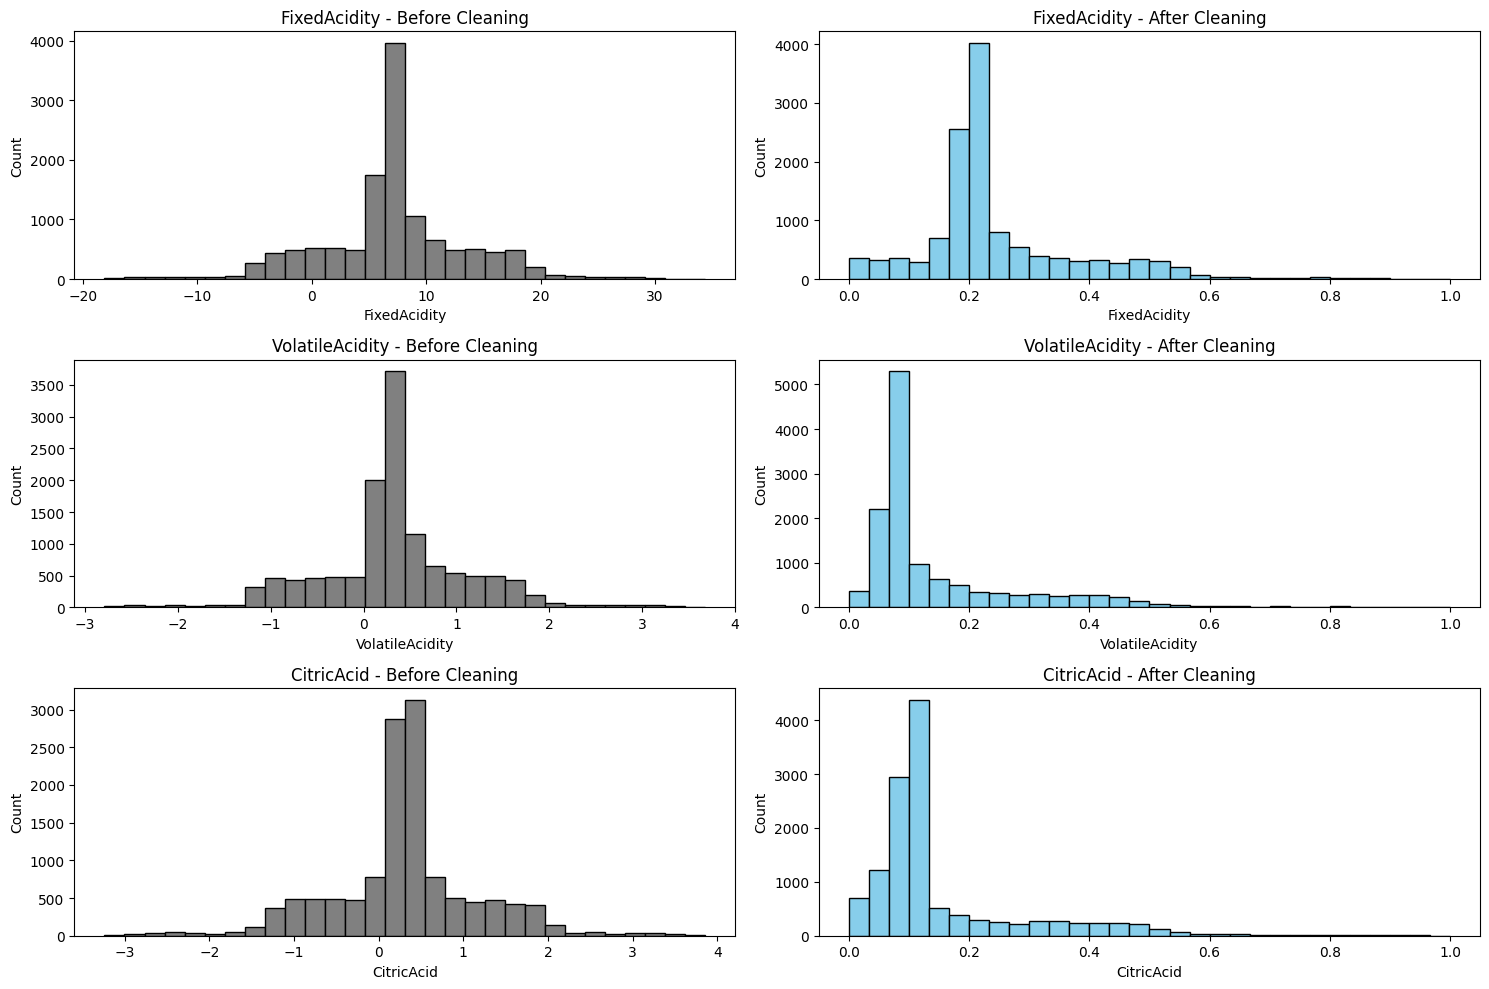

In [94]:
acid_cols = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid']

plt.figure(figsize=(15, 10))

for i, col in enumerate(acid_cols):
  # original frame
  plt.subplot(3, 2, i*2 + 1)
  plt.hist(df[col], bins=30, color='gray', edgecolor='black')
  plt.title(f'{col} - Before Cleaning')
  plt.xlabel(col)
  plt.ylabel('Count')
  # cleaned frame
  plt.subplot(3, 2, i*2 + 2)
  plt.hist(df_copy[col], bins=30, color='skyblue', edgecolor='black')
  plt.title(f'{col} - After Cleaning')
  plt.xlabel(col)
  plt.ylabel('Count')

plt.tight_layout()
plt.show()

Based on the above graphs, the distance between both ends is now reduced and restricted to 0 and 1. We can now see that lower levels of acidity is prevalent in wines due to their distributions being easier to interpret as right-skewed.

## Conclusion

Initially, the dataset was presented with several data integrity issues, including missing values, inconsistent data types, and inconsistent values that didn't align with their respective attributes (negative acidity levels). To address these issues, invalid values were replaced with NaN and appropriate imputation methods were applied. Categorical and ordinal attributes were correctly casted to their appropriate types and normalization wasa applied to certain continuous variables. These preparations improved the quality and consistency of the dataset.